In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# mpl.style.use('seaborn')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
car=pd.read_csv('/content/drive/MyDrive/DA Project/quikr_car.csv')

In [ ]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
car.shape

(892, 6)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


##### Creating backup copy

In [ ]:
backup=car.copy()

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data

#### year has many non-year values

In [ ]:
car=car[car['year'].str.isnumeric()]

#### year is in object. Change to integer

In [ ]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price

In [ ]:
car=car[car['Price']!='Ask For Price']

#### Price has commas in its prices and is in object

In [ ]:
car['Price']=car['Price'].str.replace(',','').astype(int)

####  kms_driven has object values with kms at last.

In [ ]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#### It has nan values and two rows have 'Petrol' in them

In [ ]:
car=car[car['kms_driven'].str.isnumeric()]

In [ ]:
car['kms_driven']=car['kms_driven'].astype(int)

In [ ]:
print(car.isna().sum())

for column in car.select_dtypes(include=np.number).columns:
    if car[column].isnull().any():
        median_val = car[column].median()
        car[column].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{column}' with median: {median_val}")
    else:
        print(f"Column '{column}' has no missing values.")

print("\nMissing values after filling:")
print(car.isna().sum())

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64
Column 'year' has no missing values.
Column 'Price' has no missing values.
Column 'kms_driven' has no missing values.

Missing values after filling:
name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64


In [ ]:
car.shape

(817, 6)

### Name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [ ]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

# Outlier Removal

In [ ]:
Q1_price = car['Price'].quantile(0.25)
Q3_price = car['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
car = car[(car['Price'] >= Q1_price - 1.5 * IQR_price) & (car['Price'] <= Q3_price + 1.5 * IQR_price)]

Q1_kms = car['kms_driven'].quantile(0.25)
Q3_kms = car['kms_driven'].quantile(0.75)
IQR_kms = Q3_kms - Q1_kms
car = car[(car['kms_driven'] >= Q1_kms - 1.5 * IQR_kms) & (car['kms_driven'] <= Q3_kms + 1.5 * IQR_kms)]

Fill Missing value

#### Resetting the index of the final cleaned data

In [ ]:
car=car.reset_index(drop=True)

## Cleaned Data

In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
720,Skoda Fabia,Skoda,2009,110000,45000,Petrol
721,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
722,Tata Indica V2,Tata,2009,110000,30000,Diesel
723,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
car.to_csv('/content/drive/MyDrive/DA Project/Cleaned_Car_data.csv')

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        725 non-null    object
 1   company     725 non-null    object
 2   year        725 non-null    int64 
 3   Price       725 non-null    int64 
 4   kms_driven  725 non-null    int64 
 5   fuel_type   724 non-null    object
dtypes: int64(3), object(3)
memory usage: 34.1+ KB


In [ ]:
car=car[car['Price']<6000000]

In [ ]:
car.describe(include='all')


,name,company,year,Price,kms_driven,fuel_type
count,725,725,725.000000,725.000000,725.000000,724
unique,224,21,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,47,211,NaN,NaN,NaN,406
mean,NaN,NaN,2012.284138,325692.593103,41425.237241,NaN
std,NaN,NaN,4.033949,203730.409280,22658.456594,NaN
min,NaN,NaN,1995.000000,30000.000000,0.000000,NaN
25%,NaN,NaN,2010.000000,168000.000000,27000.000000,NaN
50%,NaN,NaN,2013.000000,284999.000000,40000.000000,NaN
75%,NaN,NaN,2015.000000,449999.000000,55000.000000,NaN


### Checking relationship of Company with Price

In [ ]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Volkswagen', 'Chevrolet', 'BMW',
       'Nissan', 'Tata', 'Fiat', 'Force', 'Mercedes', 'Hindustan',
       'Mitsubishi', 'Jeep'], dtype=object)

In [ ]:
import seaborn as sns

/tmp/ipython-input-2788130517.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


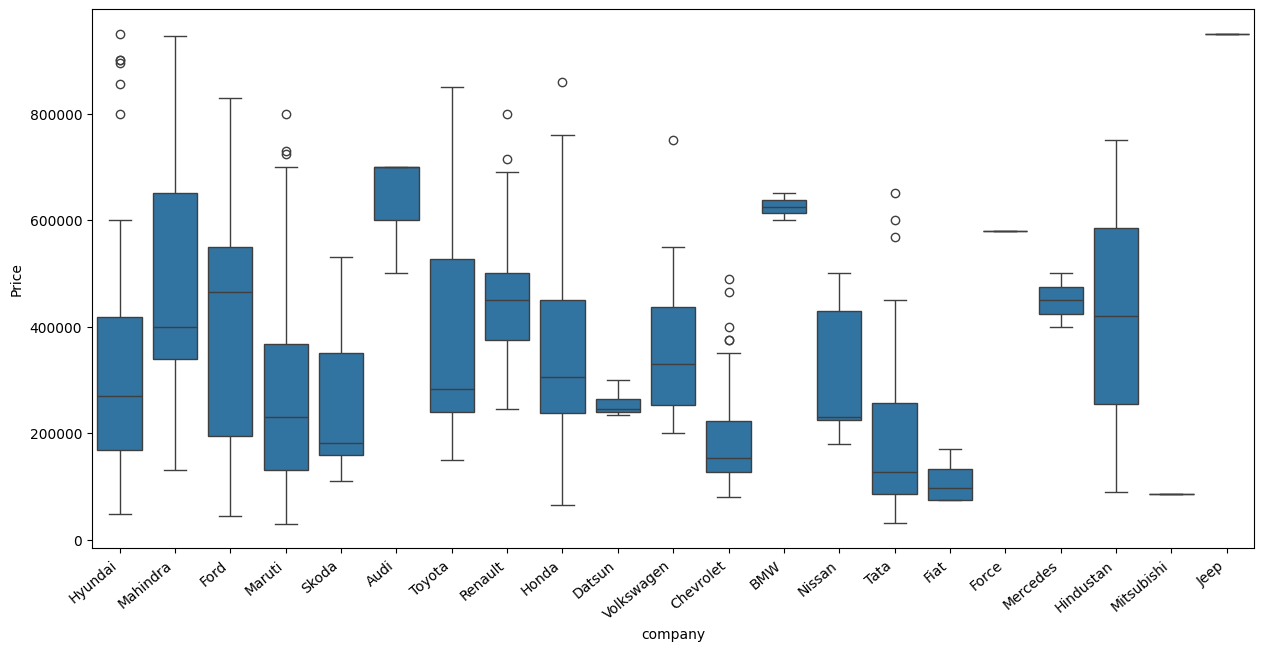

In [ ]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

/tmp/ipython-input-2542042277.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


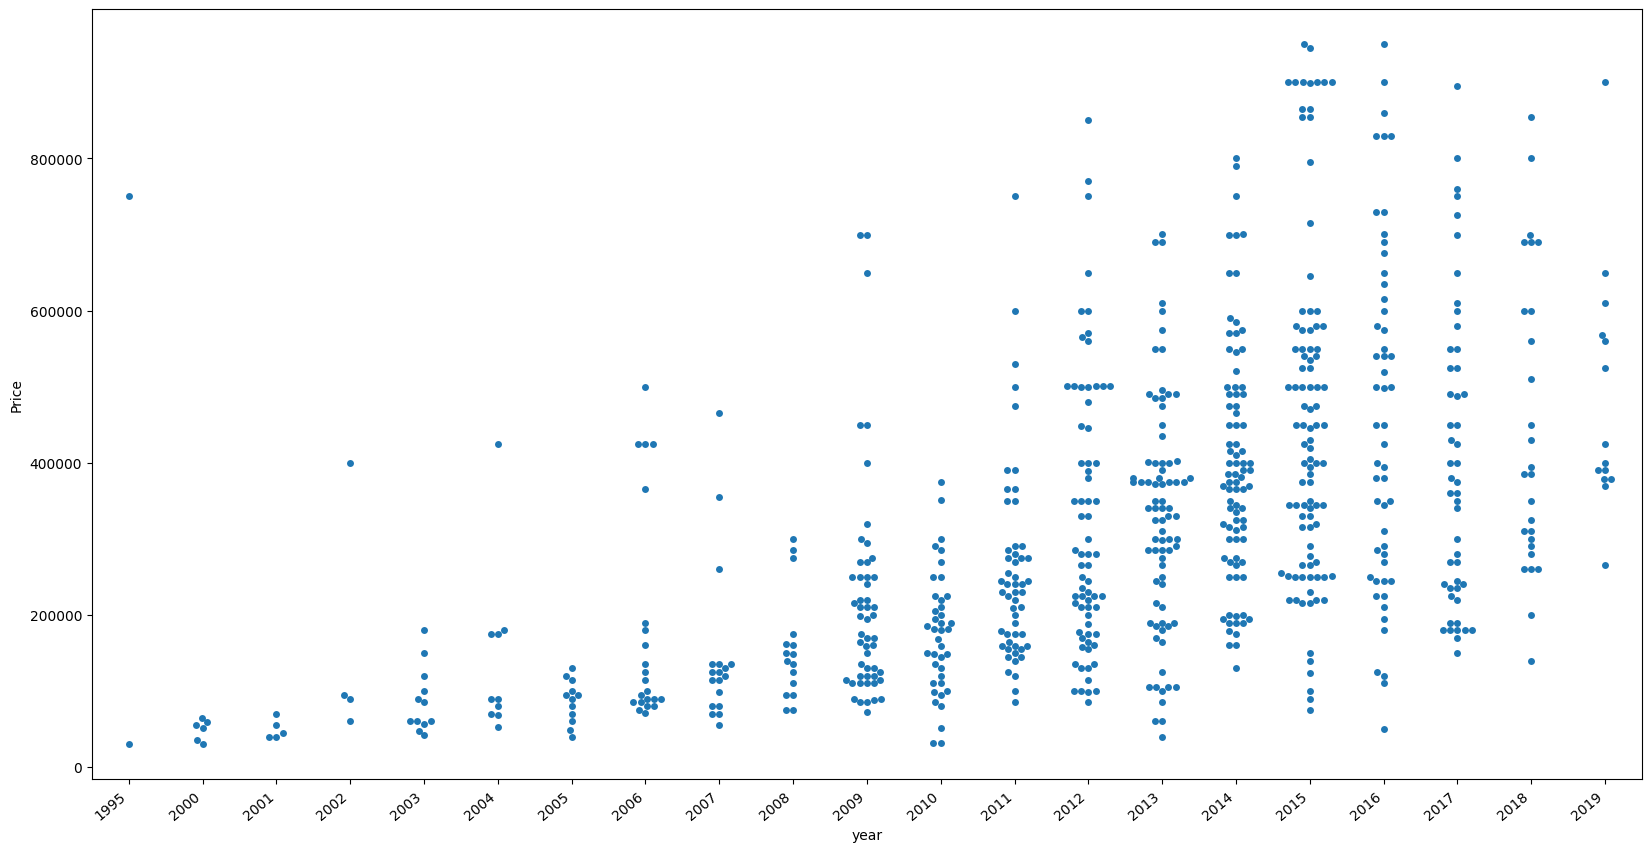

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

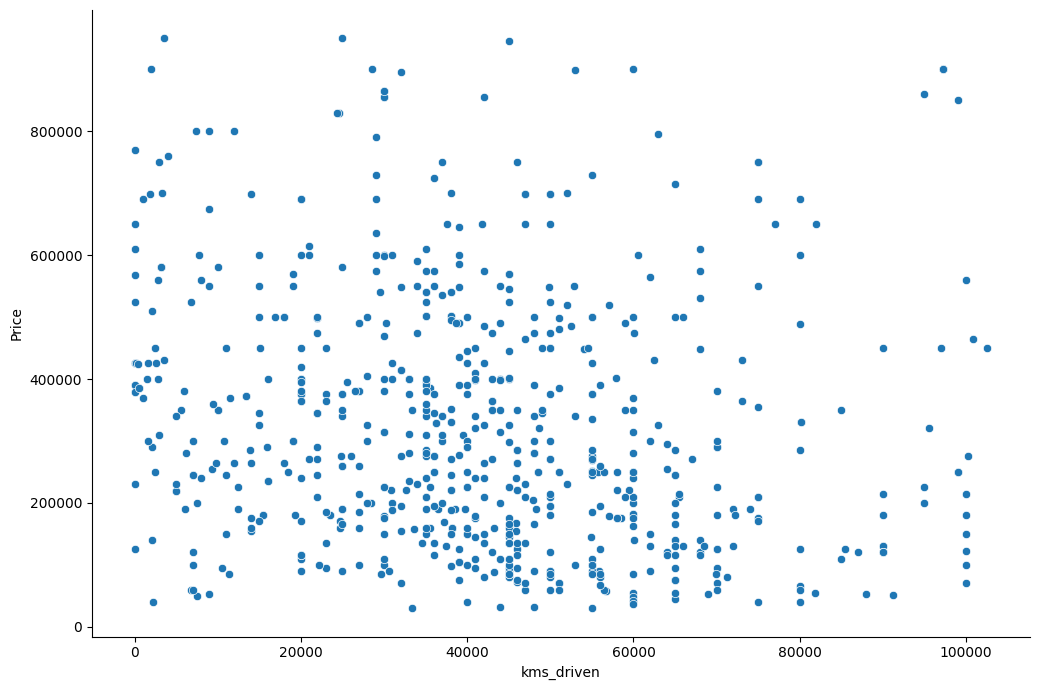

In [ ]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

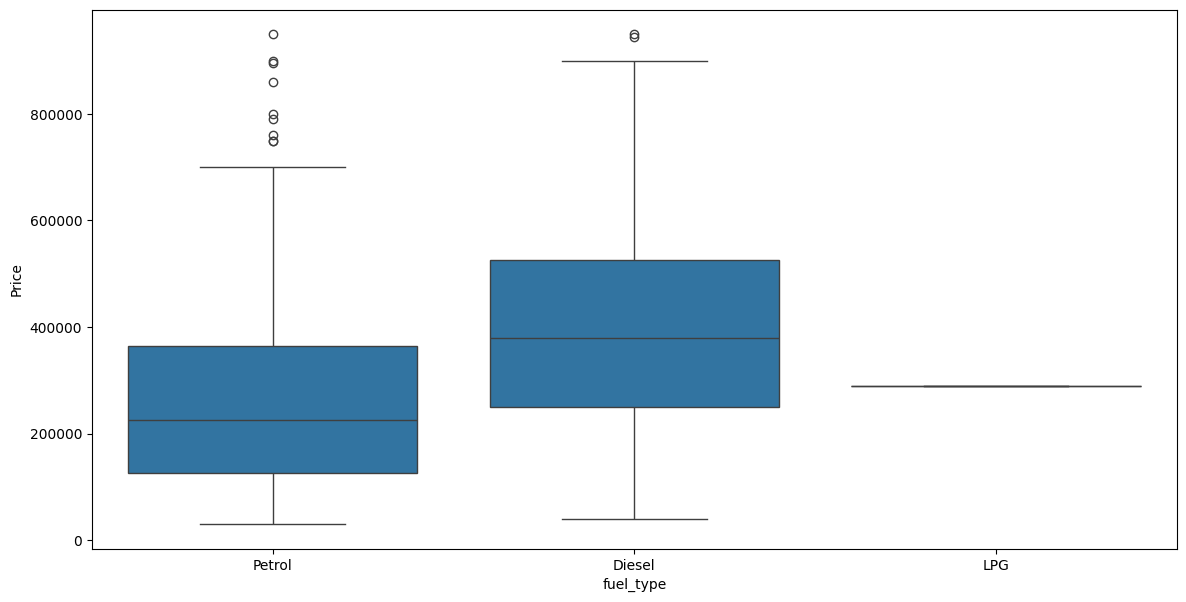

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

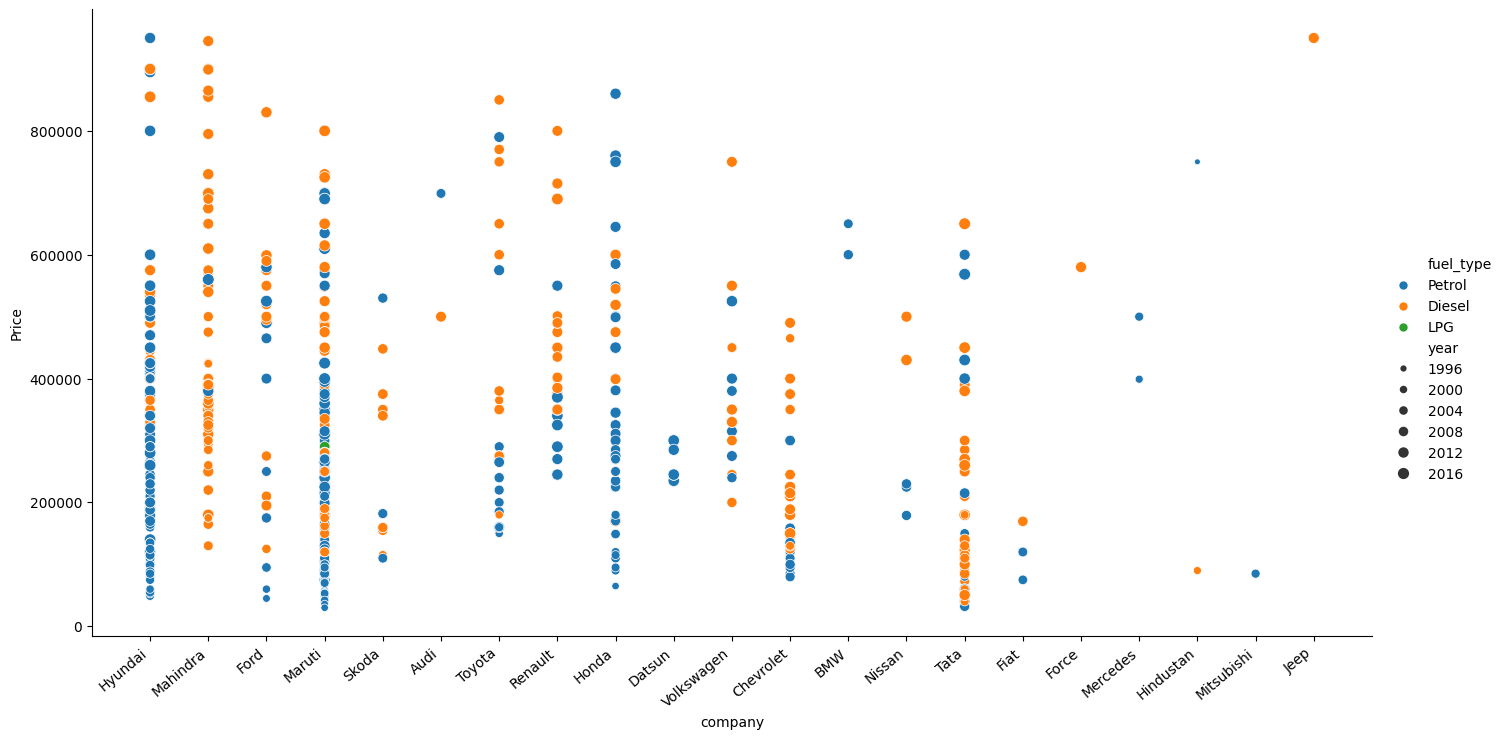

In [ ]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [ ]:
car.corr(numeric_only=True)['Price']

,Price
year,0.523282
Price,1.000000
kms_driven,-0.153690


<Axes: >

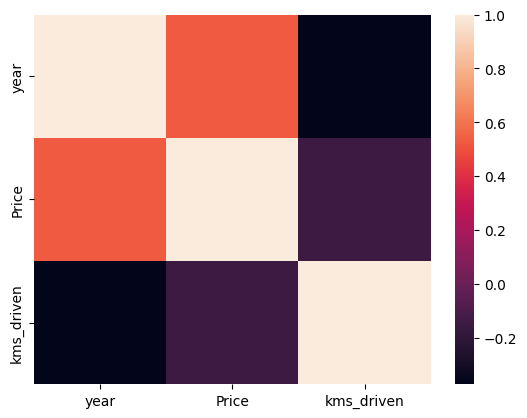

In [ ]:
sns.heatmap(car.corr(numeric_only=True))

/tmp/ipython-input-979349277.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(car['Price']))


<Axes: xlabel='Price', ylabel='Density'>

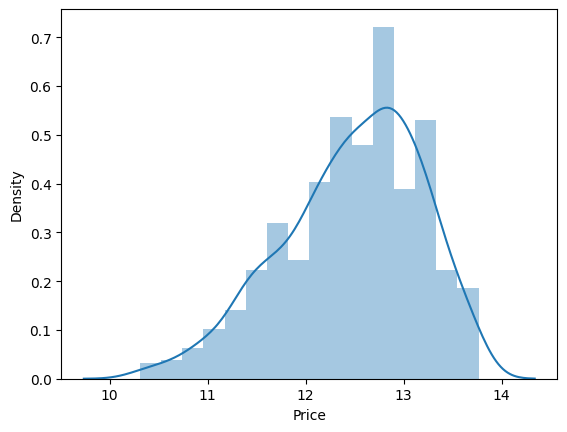

In [ ]:
sns.distplot(np.log(car['Price']))

/tmp/ipython-input-3319714974.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car['kms_driven'])


<Axes: xlabel='kms_driven', ylabel='Density'>

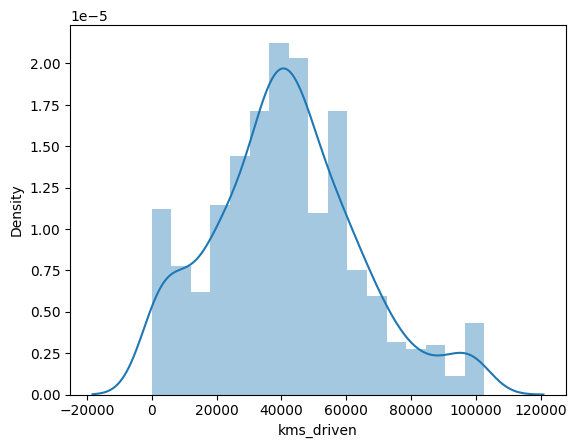

In [ ]:
sns.distplot(car['kms_driven'])

/tmp/ipython-input-1651513990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car['year'])


<Axes: xlabel='year', ylabel='Density'>

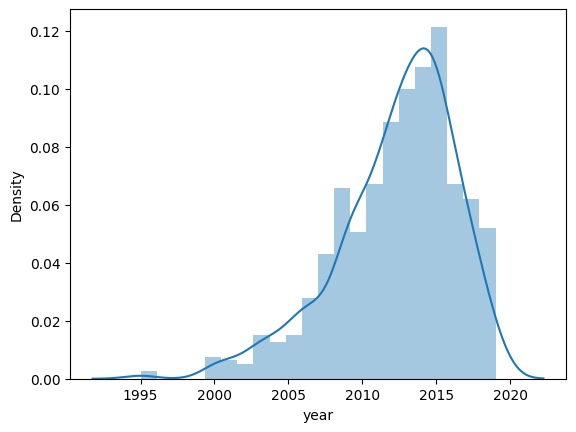

In [ ]:
sns.distplot(car['year'])

In [ ]:
car.skew(numeric_only=True)


,0
year,-0.953551
Price,0.864037
kms_driven,0.357494


In [ ]:
car.kurt(numeric_only=True)

,0
year,1.035172
Price,0.272250
kms_driven,0.022601


In [ ]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [ ]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
720,Skoda Fabia,Skoda,2009,45000,Petrol
721,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
722,Tata Indica V2,Tata,2009,30000,Diesel
723,Tata Zest XM,Tata,2018,27000,Diesel


In [ ]:
y.shape

(725,)

### Applying Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [ ]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [ ]:
lr=LinearRegression()

#### Making a pipeline

In [ ]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A4 1.8', 'Audi Q7', 'BMW 3 Series', 'BMW 5 Series',
       'Chevrolet Beat', 'Chevrolet Beat Diesel', 'Chevrolet Beat LS',
       'Chevrolet Beat LT', 'Chevrolet Beat PS', 'Chevrolet Cruze LTZ',
       'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4', 'Chevrolet S...
      dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jeep', 'Mahindra', 'Maruti',
       'Mercedes', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen'], dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol', nan], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [ ]:
r2_score(y_test,y_pred)

0.7053075307025788

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

np.int64(10)

In [ ]:
scores[np.argmax(scores)]

0.8509218164896539

In [ ]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([460168.16260984])

#### The best model is found at a certain random state

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8509218164896539

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([441664.95637268])

In [ ]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A4 1.8', 'Audi Q7', 'BMW 3 Series', 'BMW 5 Series',
       'Chevrolet Beat', 'Chevrolet Beat Diesel', 'Chevrolet Beat LS',
       'Chevrolet Beat LT', 'Chevrolet Beat PS', 'Chevrolet Cruze LTZ',
       'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4', 'Chevrolet Sail 1.2',
       'Chevrolet Sail UVA', 'Chevrolet Spark', 'Chevrolet Spark 1.0',
       'Chevrolet Spark LS', 'Chevrolet Spark LT', 'Chevrolet Tavera LS',
       'Chevrolet Tavera Neo', 'Datsun GO T', 'Datsun Go Plus',
       'Datsun Redi GO', 'Fiat Linea Emotion', 'Fiat Petra ELX',
       'Fiat Punto Emotion', 'Force Motors Force', 'Ford EcoSport',
       'Ford EcoSport Ambiente', 'Ford EcoSport Titanium',
       'Ford EcoSport Trend', 'Ford Fiesta', 'Ford Fiesta SXi',
       'Ford Figo', 'Ford Figo Diesel', 'Ford Figo Duratorq',
       'Ford Figo Petrol', 'Ford Fusion 1.4', 'Ford Ikon 1.3',
       'Ford Ikon 1.6', 'Hindustan Motors Ambassador', 'Honda Accord',
       'Honda Amaze', 'Honda Amaze 1.2', 'Honda Amaze 1.5', 